# Práctica 8: Redes Neuronales
**Objetivo:** Utilizar Redes Neuronales para la detección de patrones.
<br>
**Equipo 5** <br>
Castro Cazares Carlos Jahir (Responsable)<br>
Martinez Resendiz Giovanni Hasid<br>
Velazquez Aguilar Jaime Isai<br>

# PARTE 1: Entrenamiento

In [ ]:
# Librerias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(tf.__version__)

2.5.0


In [ ]:
# Importar el data set fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Camiseta/Top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
                 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botines']

4423680/4422102 [==============================] - 0s 0us/step


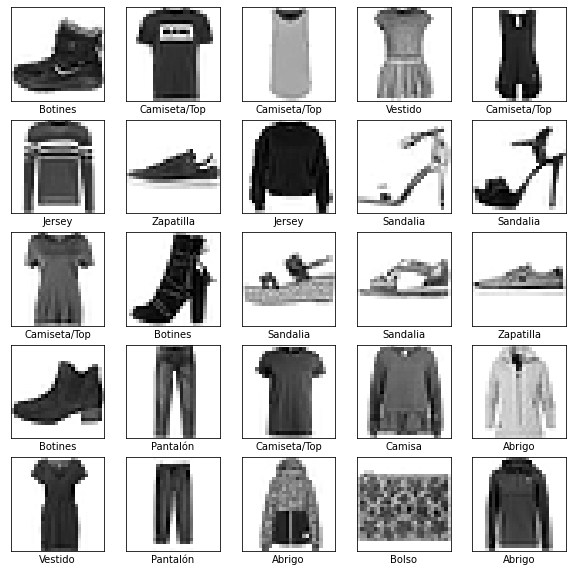

In [ ]:
# Mostrar Dataset
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Costruir el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5070 - accuracy: 0.8222
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8613
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3429 - accuracy: 0.8754
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8830
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8905
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.8969
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.9004
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9046
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9075
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

# PARTE 2: Pruebas

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrecision:', test_acc)
print('\nPerdida:', test_loss)

313/313 - 0s - loss: 0.3945 - accuracy: 0.8861

Precision: 0.8860999941825867

Perdida: 0.3945036232471466


# PARTE 3: Predicción

In [ ]:
# Ligando las notas con drive
from google.colab import drive
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 2

Mounted at /content/drive


In [ ]:
# Moviendo a la carpeta de Drive
import os
os.chdir("drive/")
os.chdir("My Drive/")
os.chdir("Colab Notebooks/")
os.chdir("AGVD/")
os.chdir("Practica 08/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/AGVD/Practica 08'

In [ ]:
# Funciones para graficar
# Graficar las imagenes y sus resultados
def showImagen(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Graficar las probabilidades
def showValues(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Predecir ropa a partir del modelo
def identificar_ropa(img, label):
  imgInput = np.expand_dims(img, 0)
  predictions_single = model.predict(imgInput)
  print(predictions_single)

  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  showImagen(predictions_single[0], label, img)
  plt.subplot(1,2,2)
  showValues(predictions_single[0], label)
  plt.xticks(range(10), class_names, rotation=45)
  plt.show()

[[5.2528763e-01 6.2010156e-05 8.4597364e-02 7.4629014e-07 8.2283569e-03
  1.8025729e-06 1.4745232e-01 6.5369102e-07 2.3436904e-01 1.4349500e-07]]


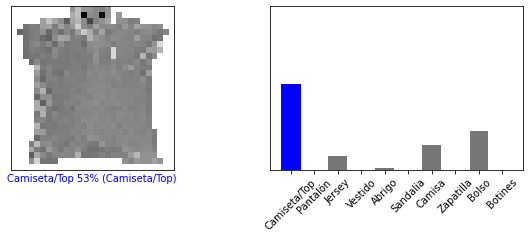

In [ ]:
# Imagenes para predicciones tomadas
img = cv2.imread("img/camiseta.jpg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 0)

[[2.2252742e-03 2.7326342e-01 7.1856236e-01 3.9038326e-14 5.8577640e-05
  3.9222006e-10 3.9373892e-03 1.1254832e-15 1.9528395e-03 6.6691605e-15]]


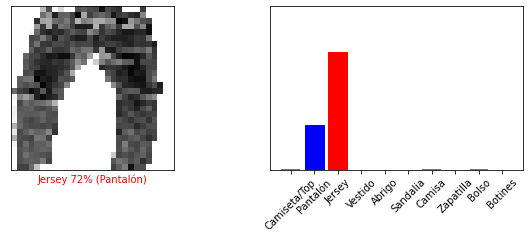

In [ ]:
img = cv2.imread("img/pantalon.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 1)

[[1.6757108e-01 2.7466065e-03 8.1059098e-01 7.2933144e-06 1.0550565e-02
  7.0273687e-10 1.9963977e-03 2.5123669e-13 6.5371240e-03 3.5634343e-08]]


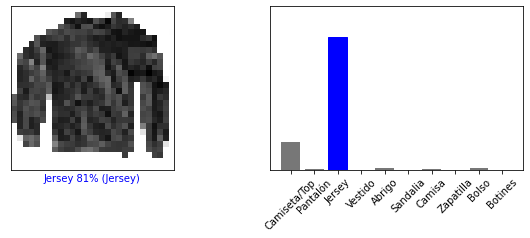

In [ ]:
img = cv2.imread("img/jersey.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 2)

[[1.8654938e-04 7.7973721e-07 1.2135746e-06 9.9799001e-01 2.7442158e-07
  9.2115187e-09 1.8209611e-03 1.0195992e-07 1.1517199e-08 7.7794077e-10]]


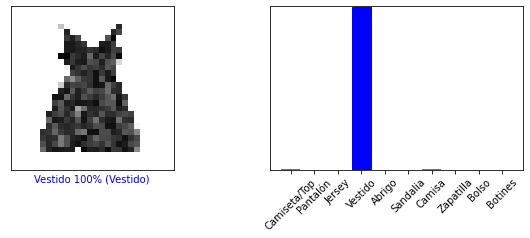

In [ ]:
img = cv2.imread("img/vestido.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 3)

[[2.3955603e-01 2.3571398e-02 8.3614029e-02 1.6989779e-02 3.1527922e-01
  4.1210351e-06 3.1343693e-01 2.1950304e-04 7.3225447e-03 6.4609912e-06]]


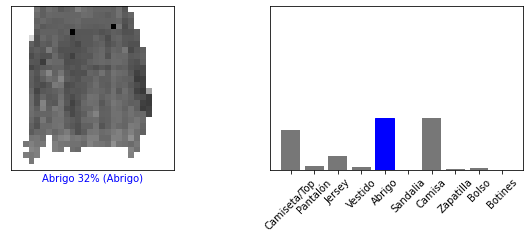

In [ ]:
img = cv2.imread("img/abrigo.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 4)

[[6.4159782e-11 7.6119840e-12 4.7553294e-06 8.4573269e-02 5.4756897e-06
  3.5426834e-01 3.0476660e-01 1.4391122e-04 3.7079456e-08 2.5623763e-01]]


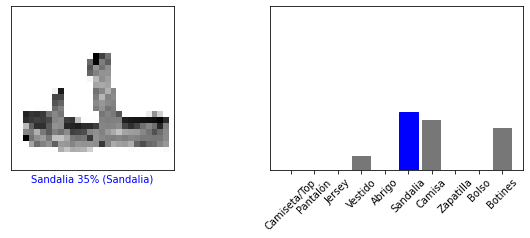

In [ ]:
img = cv2.imread("img/sandalias.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 5)

[[2.1319631e-01 4.8971536e-08 1.9702774e-02 1.3118093e-07 7.4369901e-01
  1.0173267e-15 2.3400556e-02 4.9233568e-16 1.1256795e-06 2.7584960e-11]]


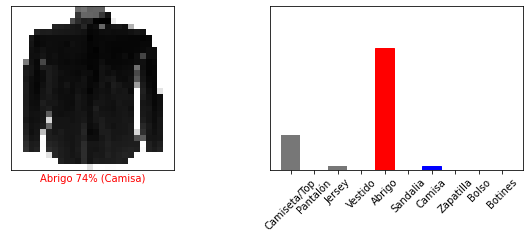

In [ ]:
img = cv2.imread("img/camisa.jpg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 6)

[[1.3548182e-16 3.3871232e-15 2.3790736e-08 1.3552916e-08 3.5201997e-10
  1.4276827e-03 2.7387629e-11 1.5890470e-06 9.9834085e-01 2.2986978e-04]]


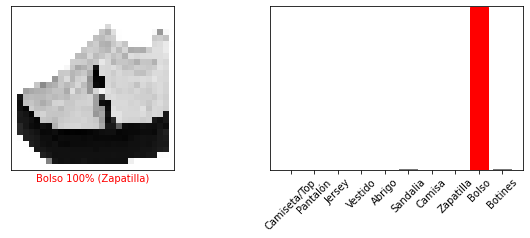

In [ ]:
img = cv2.imread("img/zapatilla.jpg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 7)

[[7.1820240e-03 3.2071312e-04 8.4653720e-02 1.1343332e-03 4.3086015e-04
  1.1451973e-03 2.1039851e-01 1.0511824e-03 6.8541288e-01 8.2705356e-03]]


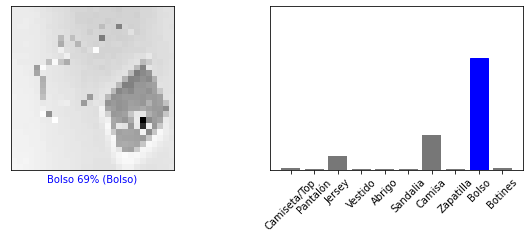

In [ ]:
img = cv2.imread("img/Bolso.jpeg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 8)

[[1.3930639e-22 2.0585825e-19 6.0111539e-17 9.7744056e-21 3.6459344e-25
  6.4741062e-06 1.0141381e-14 7.3128111e-05 4.8377589e-21 9.9992037e-01]]


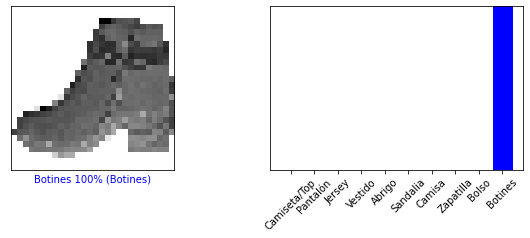

In [ ]:
img = cv2.imread("img/botines.jpg")
imgP = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgP = cv2.resize(imgP, (28,28))
imgP = imgP / 255.0
identificar_ropa(imgP, 9)

[[3.9934548e-20 2.4757635e-21 7.2822420e-17 8.4822607e-17 7.1737694e-18
  1.7933325e-09 6.9484728e-13 6.4355991e-05 4.7318473e-12 9.9993563e-01]]


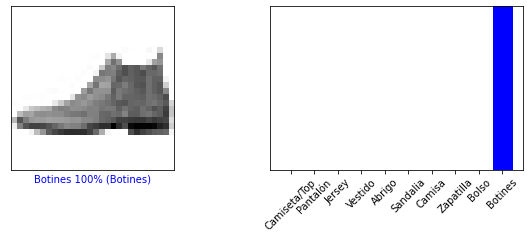

In [ ]:
identificar_ropa(test_images[0], test_labels[0])

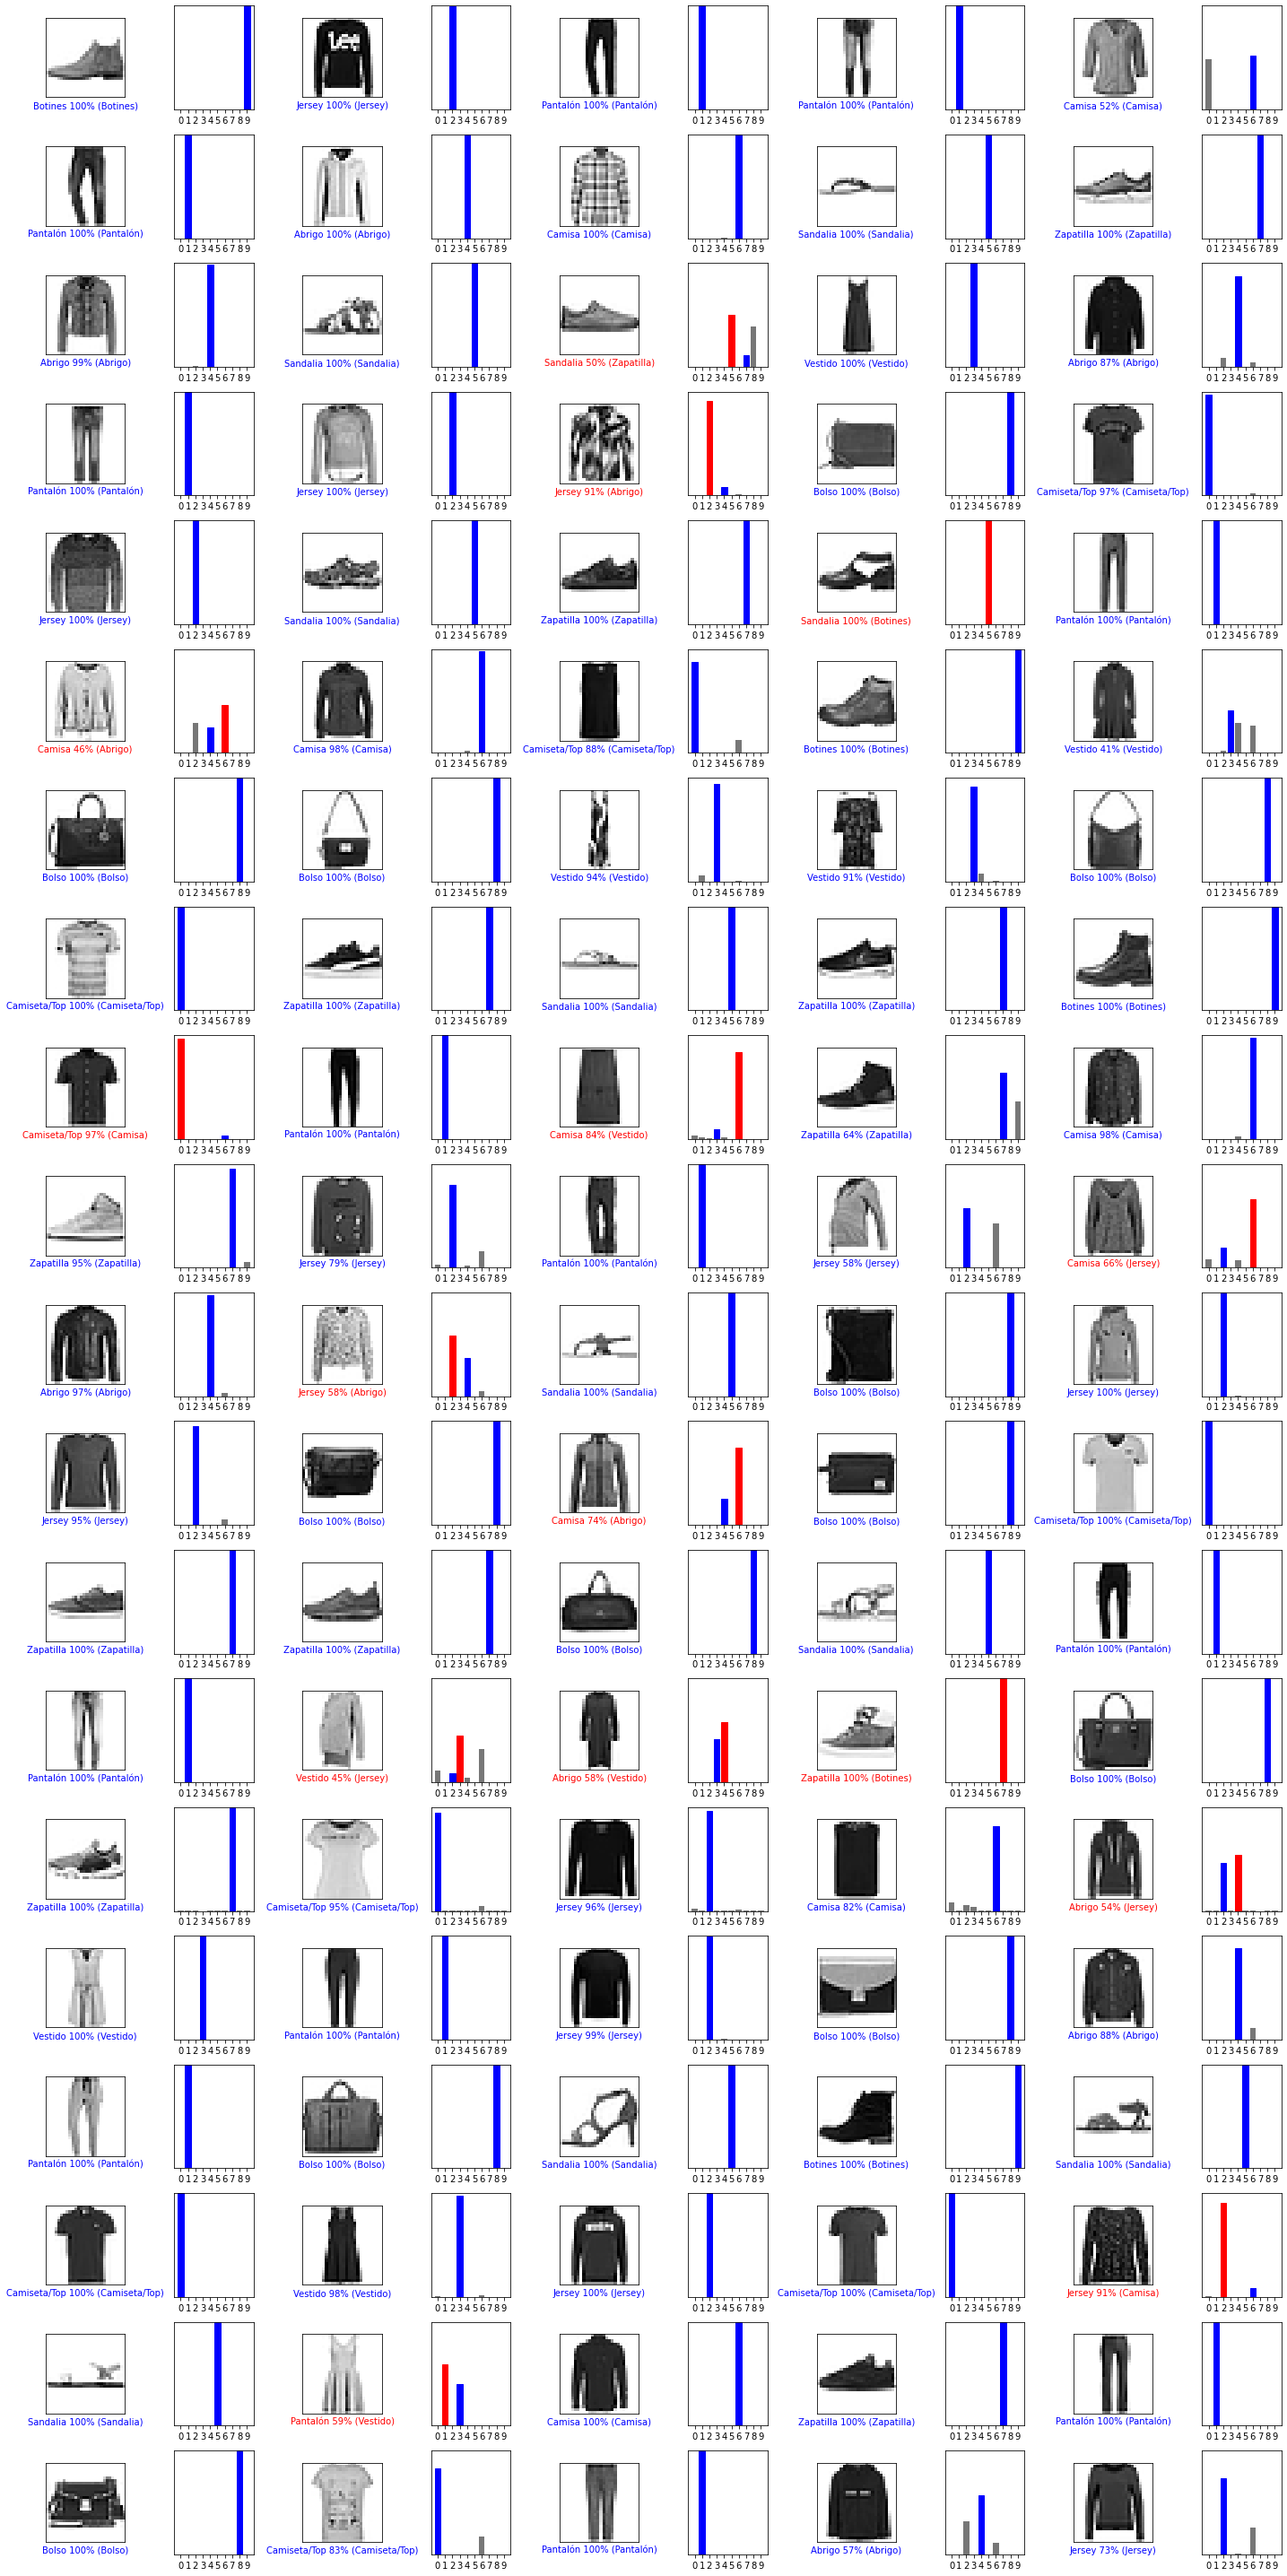

In [ ]:
# Resultado de las primeras 100 imagenes de prueba
predictions = model.predict(test_images)
num_rows = 20
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  showImagen(predictions[i], test_labels[i], test_images[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  showValues(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()